## BREAKING IMAGE CAPTCHA CNN MODEL WITH CIFAR-10 Dataset

In [1]:
### Import various libraries ###
import tensorflow as tf 
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
import timeit

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils

%matplotlib inline

In [2]:
# Is a CUDA GPU set up correctly?
tf.config.list_physical_devices('GPU')

[]

In [3]:
### Import CIFAR-10 Data ###
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [4]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)


In [6]:
### Dimensionality of Y_train ###
Y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
### Convert Y_train from a 2 dimensional to 1 dimensional array ###
Y_train = Y_train.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [8]:
### Plot sample image ###
# plt.imshow(X_train[35])

In [9]:
### Assign the classes with their actual names and not numbered labels ###
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

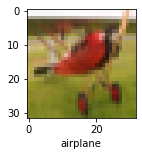

In [10]:
### Plot sample image again with the proper class label ###
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train,Y_train,35)

In [11]:
### Normalize data by dividing both X train test by 255 ###
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model 5: experimenting on model 3 w/ weight decay

In [22]:
start_time = timeit.default_timer()

weight_decay = 1e-4

# 81% @ 50 epochs
model_5 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3),
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, 3, activation='relu', padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, 3, activation='relu', padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(2),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(len(classes), activation='softmax'),
])

In [23]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam


model_5.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Fitting the model with batch size of 128 and 20 training epochs ###
history_5 = model_5.fit(X_train, 
                    Y_train, 
                    epochs=50,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))


Epoch 1/50
391/391 [==============================] - 20s 47ms/step - loss: 1.7826 - accuracy: 0.3578 - val_loss: 4.3461 - val_accuracy: 0.1124
Epoch 2/50
391/391 [==============================] - 18s 45ms/step - loss: 1.3207 - accuracy: 0.5334 - val_loss: 1.1665 - val_accuracy: 0.5925
Epoch 3/50
391/391 [==============================] - 17s 45ms/step - loss: 1.1275 - accuracy: 0.6171 - val_loss: 0.9245 - val_accuracy: 0.6751
Epoch 4/50
391/391 [==============================] - 17s 45ms/step - loss: 0.9925 - accuracy: 0.6704 - val_loss: 1.0009 - val_accuracy: 0.6650
Epoch 5/50
391/391 [==============================] - 17s 45ms/step - loss: 0.9015 - accuracy: 0.7065 - val_loss: 1.1653 - val_accuracy: 0.6247
Epoch 6/50
391/391 [==============================] - 17s 44ms/step - loss: 0.8319 - accuracy: 0.7323 - val_loss: 0.8585 - val_accuracy: 0.7176
Epoch 7/50
391/391 [==============================] - 17s 45ms/step - loss: 0.7769 - accuracy: 0.7539 - val_loss: 0.7509 - val_accuracy:

In [24]:
model_5.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7628 - accuracy: 0.8144


[0.7627822756767273, 0.8144000172615051]

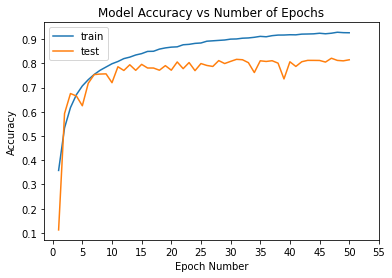

In [25]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_5.history['accuracy'])), history_5.history['accuracy'])
plt.plot(range(1,1+len(history_5.history['val_accuracy'])), history_5.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 60, 5))
plt.show()

In [26]:
mins = (timeit.default_timer() - start_time) / 60
print(f'Time Taken: {mins:.2f} mins')

Time Taken: 14.60 mins


## Model 6: Giovenale's model
https://www.kaggle.com/c/cifar-10/discussion/40237

In [70]:
start_time = timeit.default_timer()


baseMapNum = 32
weight_decay = 1e-4

# 84% @ 40 epochs
model_6 = tf.keras.Sequential([
    layers.Conv2D(baseMapNum, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:],
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(2*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(2*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),  
   
    layers.Conv2D(4*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(len(classes), activation='softmax'),
    
])

In [71]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam


model_6.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Fitting the model with batch size of 128 and 20 training epochs ###
history_6 = model_6.fit(X_train, 
                    Y_train, 
                    epochs=80,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/80
391/391 [==============================] - 44s 108ms/step - loss: 1.8597 - accuracy: 0.4343 - val_loss: 2.8190 - val_accuracy: 0.2193
Epoch 2/80
391/391 [==============================] - 41s 106ms/step - loss: 1.2974 - accuracy: 0.5923 - val_loss: 1.0741 - val_accuracy: 0.6361
Epoch 3/80
391/391 [==============================] - 42s 107ms/step - loss: 1.0995 - accuracy: 0.6570 - val_loss: 1.0955 - val_accuracy: 0.6510
Epoch 4/80
391/391 [==============================] - 42s 106ms/step - loss: 0.9689 - accuracy: 0.6908 - val_loss: 0.8959 - val_accuracy: 0.7067
Epoch 5/80
391/391 [==============================] - 41s 106ms/step - loss: 0.8668 - accuracy: 0.7193 - val_loss: 0.9062 - val_accuracy: 0.7019
Epoch 6/80
391/391 [==============================] - 42s 107ms/step - loss: 0.8088 - accuracy: 0.7352 - val_loss: 0.8318 - val_accuracy: 0.7181
Epoch 7/80
391/391 [==============================] - 41s 106ms/step - loss: 0.7335 - accuracy: 0.7569 - val_loss: 0.7355 - val_ac

In [72]:
model_6.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5433 - accuracy: 0.8515


[0.5432793498039246, 0.8514999747276306]

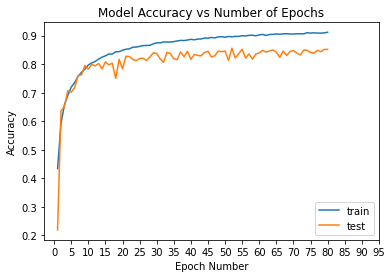

In [73]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_6.history['accuracy'])), history_6.history['accuracy'])
plt.plot(range(1,1+len(history_6.history['val_accuracy'])), history_6.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [74]:
mins = (timeit.default_timer() - start_time) / 60
print(f'Time Taken: {mins:.2f} mins')

Time Taken: 57.18 mins
